In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy
import seaborn as sns
import matplotlib.patches as mpatches
import os
os.chdir("C:/Users/melkrewi/Desktop/shrimp/snRNAseq/z_inactivation_asexuals/")

In [2]:
kaz_gtf=pd.read_csv("merged_kaz_adult_2.gtf",sep="\t",header=None)
kaz_gtf_2=kaz_gtf[[0,2,3,8]]
kaz_gtf_2=kaz_gtf_2[kaz_gtf_2[2]=='transcript']
kaz_gtf_2['gene_id']=kaz_gtf_2[8].str.split(';',expand=True)[0]
kaz_gtf_2=kaz_gtf_2[[0,2,3,'gene_id']].drop_duplicates(subset='gene_id', keep="first")
kaz_gtf_2['gene_id']=kaz_gtf_2['gene_id'].str[9:-1]

In [3]:
#seurat_clusters=pd.read_csv("merged_fran_adult_2.gtf",sep="\t",header=None)
normalized_exp=pd.read_csv("normalized_expression.csv",sep=",",low_memory=False)
#normalized_exp=pd.read_csv("normalized_expression_combined.csv",sep=",",low_memory=False)

In [5]:
merged_normalized=pd.merge(normalized_exp,kaz_gtf_2,left_on='gene',right_on='gene_id')

In [6]:
merged_all_norm=merged_normalized[merged_normalized[0].str.contains('Chromosome_')]

In [11]:
merged_all_norm.loc[
  merged_all_norm[0]!='Chromosome_1_RagTag', 
  'identity'
] = 'Autosomal'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')), 
  'identity'
] = 'Z'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [10]:
seurat_clusters=pd.read_csv("seurat_clusters_cells.txt",sep=",")
#seurat_clusters=pd.read_csv("seurat_clusters_combined_Cells.txt",sep=",")

In [16]:
merged_all_norm_2=merged_all_norm.drop([0,2,3,'gene','gene_id'],axis=1).groupby(["identity"]).mean().T.reset_index()

In [17]:
merged_all_norm_3=pd.merge(seurat_clusters,merged_all_norm_2,left_on='barcodes',right_on='index')
merged_all_norm_3['Z/Auto']=np.log2((merged_all_norm_3['Z']+0.001)/(merged_all_norm_3['Autosomal']+0.001))

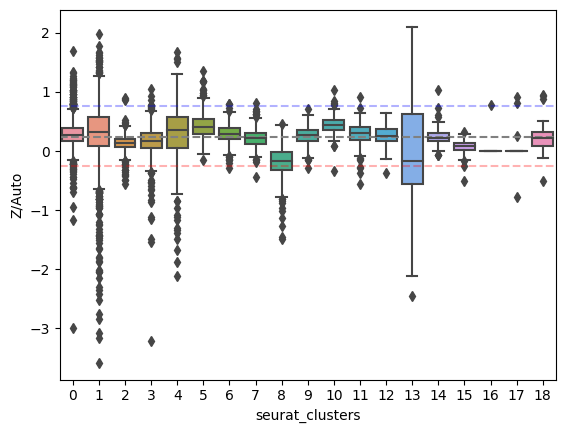

In [40]:
sns.boxplot(x='seurat_clusters', y='Z/Auto', data=merged_all_norm_3)
plt.hlines(np.median(merged_all_norm_3['Z/Auto']),-0.5,18.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_3['Z/Auto'],5),-0.5,18.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_3['Z/Auto'],95),-0.5,18.5,color="blue",linestyle='dashed',alpha=0.3)

In [7]:
merged_all_norm.loc[
  merged_all_norm[0]!='Chromosome_1_RagTag', 
  'strata'
] = 'Autosomal'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]<=1.2*10**7)), 
  'strata'
] = 'pseudo'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>1.2*10**7)&(merged_all_norm[3]<=3.2*10**7)), 
  'strata'
] = 'S1'
merged_all_norm.loc[
  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>3.2*10**7)), 
  'strata'
] = 'S0'
#merged_all_norm.loc[
#  ((merged_all_norm[0]=='Chromosome_1_RagTag')&(merged_all_norm[3]>4*10**7)), 
#  'strata'
#] = 'undefined'

C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1684: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = infer_fill_value(value)
C:\Users\melkrewi\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\indexing.py:1817: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


In [8]:
merged_all_norm_s2=merged_all_norm.drop([0,2,3,'gene','gene_id'],axis=1).groupby(["strata"]).mean().T.reset_index()

In [12]:
merged_all_norm_s3=pd.merge(seurat_clusters,merged_all_norm_s2,left_on='barcodes',right_on='index')
merged_all_norm_s3['S0/Auto']=np.log2((merged_all_norm_s3['S0']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))
merged_all_norm_s3['S1/Auto']=np.log2((merged_all_norm_s3['S1']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))
merged_all_norm_s3['pseudo/Auto']=np.log2((merged_all_norm_s3['pseudo']+0.001)/(merged_all_norm_s3['Autosomal']+0.001))

Text(0, 0.5, 'log2(S1/Autosomes)')

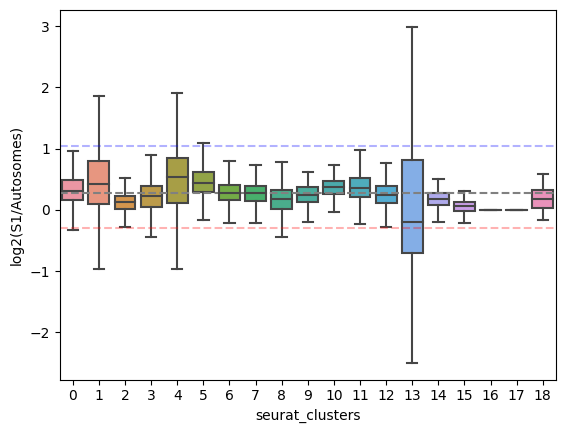

In [17]:
sns.boxplot(x='seurat_clusters', y='S1/Auto', data=merged_all_norm_s3,showfliers=False)
plt.hlines(np.median(merged_all_norm_s3['S1/Auto']),-0.5,18.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_s3['S1/Auto'],5),-0.5,18.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_s3['S1/Auto'],95),-0.5,18.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')

Text(0, 0.5, 'log2(S1/Autosomes)')

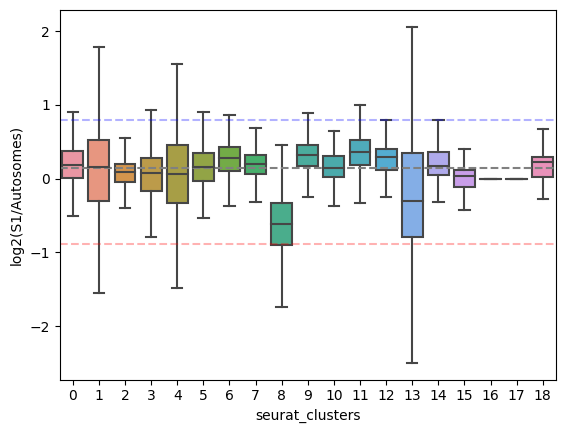

In [18]:
sns.boxplot(x='seurat_clusters', y='S0/Auto', data=merged_all_norm_s3,showfliers=False)
plt.hlines(np.median(merged_all_norm_s3['S0/Auto']),-0.5,18.5,color="gray",linestyle='dashed')
plt.hlines(np.percentile(merged_all_norm_s3['S0/Auto'],5),-0.5,18.5,color="red",linestyle='dashed',alpha=0.3)
plt.hlines(np.percentile(merged_all_norm_s3['S0/Auto'],95),-0.5,18.5,color="blue",linestyle='dashed',alpha=0.3)
plt.ylabel('log2(S1/Autosomes)',fontsize=10)
#plt.fill_between([-0.5,17.5], np.percentile(merged_all_norm_3['S0/Auto'],5),np.percentile(merged_all_norm_3['S0/Auto'],95), facecolor='lightblue', alpha=0.7)
#plt.savefig('./paper_figures/S1_vs_Auto_mean.png',bbox_inches='tight')

In [19]:
asexuality_genes=pd.read_csv("asexuality_genes.txt",sep=",")


In [22]:
asexuality_genes_L=pd.merge(asexuality_genes,kaz_gtf_2,left_on='Unnamed: 0',right_on='gene_id')

In [55]:
asexuality_genes_L[(asexuality_genes_L['gene_id']=='MSTRG.23510')]# &(asexuality_genes_L['avg_log2FC']>1)]

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,0,2,3,gene_id
518,MSTRG.23510,0.000001,-0.477076,0.026,0.194,0.037605,Chromosome_1_RagTag,transcript,35315535,MSTRG.23510


In [51]:
asexuality_genes_L[asexuality_genes_L['p_val_adj']<=0.05][0].value_counts()

Chromosome_9_RagTag                                  30
Chromosome_1_RagTag                                  29
Chromosome_2_RagTag                                  28
Chromosome_8_RagTag                                  26
Chromosome_4_RagTag                                  25
                                                     ..
C1637594                                              1
PGA_scaffold_49__4_contigs__length_3001730_RagTag     1
PGA_scaffold_55__5_contigs__length_2020500_RagTag     1
C1035946                                              1
PGA_scaffold_133__1_contigs__length_434493_RagTag     1
Name: 0, Length: 124, dtype: int64

In [49]:
asexuality_genes_L[asexuality_genes_L['gene_id']=='MSTRG.29763']

,Unnamed: 0,p_val,avg_log2FC,pct.1,pct.2,p_val_adj,0,2,3,gene_id
157,MSTRG.29763,9.684949e-10,-1.418766,0.335,0.633,0.000036,Chromosome_5_RagTag,transcript,36012141,MSTRG.29763


(array([9., 1., 0., 1., 5., 2., 3., 4., 0., 4.]),
 array([ 2114025. ,  6283271.1, 10452517.2, 14621763.3, 18791009.4,
        22960255.5, 27129501.6, 31298747.7, 35467993.8, 39637239.9,
        43806486. ]),
 <BarContainer object of 10 artists>)

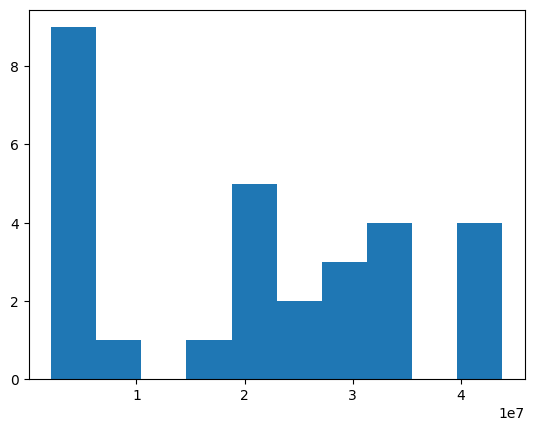

In [50]:
plt.hist(asexuality_genes_L[(asexuality_genes_L['p_val_adj']<=0.05)&(asexuality_genes_L[0]=='Chromosome_1_RagTag')][3])